In [59]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [60]:
# Import data
file_name = "AirTicket_Data_.xlsx"
df = pd.read_excel(file_name, sheet_name = "AirTicket")

In [61]:
# Display database
df.head(7)

,Point of Sale Type,Point of Sale Country,Company Name,Record Locator,Itinerary Number,Department,Travel Start Date,Travel End Date,Origin City,Destination City,...,Meeting Name,Meeting Attendee Traveler Group,Employee ID,Segment Count,Unit of Measurement,Currency,Travel Duration (Hrs),Distance,CO2 Emission,Air Expense
0,Egencia,United Kingdom,Bouygues Energies & Services Contracting UK,OTHNP3,NaN,Bouygues E+S Contracting UK,2/20/20,2/20/20,Belfast,London,...,NaN,NaN,NaN,1,Kg|Km,GBP,1.416667,503.84,123.09,218.87
1,Egencia,United Kingdom,Bouygues Energies & Services Contracting UK,Q9BOQT,NaN,Bouygues E+S Contracting UK,1/13/20,1/16/20,London,Belfast,...,NaN,NaN,NaN,2,Kg|Km,GBP,2.750000,1007.69,246.18,278.08
2,Egencia,United Kingdom,Bouygues Energies & Services Contracting UK,O9U8H6,NaN,Bouygues E+S Contracting UK,1/27/20,1/27/20,London,Belfast,...,NaN,NaN,NaN,1,Kg|Km,GBP,1.416667,503.84,123.09,158.81
3,Egencia,United Kingdom,Bouygues Energies & Services Contracting UK,M4Z4QW,NaN,Bouygues E+S Contracting UK,4/13/20,4/13/20,London,Frankfurt,...,NaN,NaN,NaN,1,Kg|Km,GBP,1.583333,654.15,159.81,170.54
4,Egencia,United Kingdom,Bouygues Energies & Services Contracting UK,W8QHDQ,NaN,Bouygues E+S Contracting UK,2/24/20,2/26/20,London,Belfast,...,NaN,NaN,NaN,2,Kg|Km,GBP,2.750000,1007.69,246.18,434.68
5,Egencia,United Kingdom,Bouygues Energies & Services Contracting UK,2GLL2J,NaN,Bouygues E+S Contracting UK,1/30/20,1/30/20,Belfast,London,...,NaN,NaN,NaN,1,Kg|Km,GBP,1.416667,503.84,123.09,62.99
6,Egencia,United Kingdom,Bouygues Energies & Services Contracting UK,PQ8YHE,NaN,Bouygues E+S Contracting UK,2020-10-02 00:00:00,2/13/20,London,Belfast,...,NaN,NaN,NaN,2,Kg|Km,GBP,2.833333,1007.69,246.18,317.68


In [35]:
# Display database info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Point of Sale Type               2329 non-null   object 
 1   Point of Sale Country            2329 non-null   object 
 2   Company Name                     2329 non-null   object 
 3   Record Locator                   2329 non-null   object 
 4   Itinerary Number                 0 non-null      float64
 5   Department                       2329 non-null   object 
 6   Travel Start Date                2329 non-null   object 
 7   Travel End Date                  2329 non-null   object 
 8   Origin City                      2329 non-null   object 
 9   Destination City                 2329 non-null   object 
 10  Routing                          2329 non-null   object 
 11  In Policy                        2329 non-null   object 
 12  Booking Method      

In [ ]:
# All these fields have only one value, we can get rid of them
print(df['Unit of Measurement'].unique())
print(df['Currency'].unique())
print(df['Point of Sale Type'].unique())
print(df['Point of Sale Country'].unique())
print(df['Company Name'].unique())

In [39]:
# Drop unnecessary fields.
df.drop(columns=['Itinerary Number', 'Meeting Name', 'Meeting Attendee Traveler Group', 'Currency', 'Unit of Measurement', 'Point of Sale Type', 'Point of Sale Country', 'Company Name','Department',  'Employee ID'], inplace=True)

In [36]:
# One hot encoding for categorical 'Booking Method'
df = pd.get_dummies(df, columns=['Booking Method'])

In [37]:
# Function which turns different strings into similar datetime format.
def parse_date(date_str):
    # Replace all dashes with slashes and parse using slashes.
    date_str = str(date_str).replace('-', '/')
    parts = date_str.split('/')
    
    # Adds leading zeros and turns yyyy into yy
    if(len(parts[0]) == 1):
         parts[0] = '0' + parts[0]
    if(len(parts[1]) == 1):
         parts[1] = '0' + parts[1]
    parts[2] = parts[2][:2]

    # Gets all different formats into one consistent datetime format.
    try:   
        rearranged_date = f"{parts[1]}/{parts[0]}/{parts[2]}" 
        return pd.to_datetime(rearranged_date, format='%d/%m/%y')
    except:
        parts[1] = parts[1][:2]
        parts[0] = parts[0][:2]
        rearranged_date = f"{parts[1]}/{parts[2]}/{parts[0]}"
        return pd.to_datetime(rearranged_date, format='%d/%m/%y')

# Turn all dates into datetime of the same format.
df['Travel Start Date'] = df['Travel Start Date'].apply(parse_date)
df['Travel End Date'] = df['Travel End Date'].apply(parse_date)


In [ ]:
# Turn start and end date into numerical values.
df['Travel Start Date'] = df['Travel Start Date'].astype('int64') / (10**9)
df['Travel End Date'] = df['Travel End Date'].astype('int64') / (10**9)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2329 entries, 0 to 2328
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Record Locator                 2329 non-null   object        
 1   Travel Start Date              2329 non-null   datetime64[ns]
 2   Travel End Date                2329 non-null   datetime64[ns]
 3   Origin City                    2329 non-null   object        
 4   Destination City               2329 non-null   object        
 5   Routing                        2329 non-null   object        
 6   In Policy                      2329 non-null   object        
 7   Segment Count                  2329 non-null   int64         
 8   Travel Duration (Hrs)          2329 non-null   float64       
 9   Distance                       2329 non-null   float64       
 10  CO2 Emission                   2329 non-null   float64       
 11  Air Expense      

In [42]:
# Find correlation between CO2 Emission and other variables of type integer, float or boolean.
df.select_dtypes(include=['int64', 'float64','bool']).corrwith(df['CO2 Emission']).sort_values(ascending = False)

CO2 Emission                     1.000000
Distance                         0.879455
Air Expense                      0.693501
Travel Duration (Hrs)            0.558679
Segment Count                    0.206486
Travel End Date                  0.064433
Travel Start Date                0.021111
Booking Method_Agent Assisted    0.000631
Booking Method_Online           -0.000631
dtype: float64

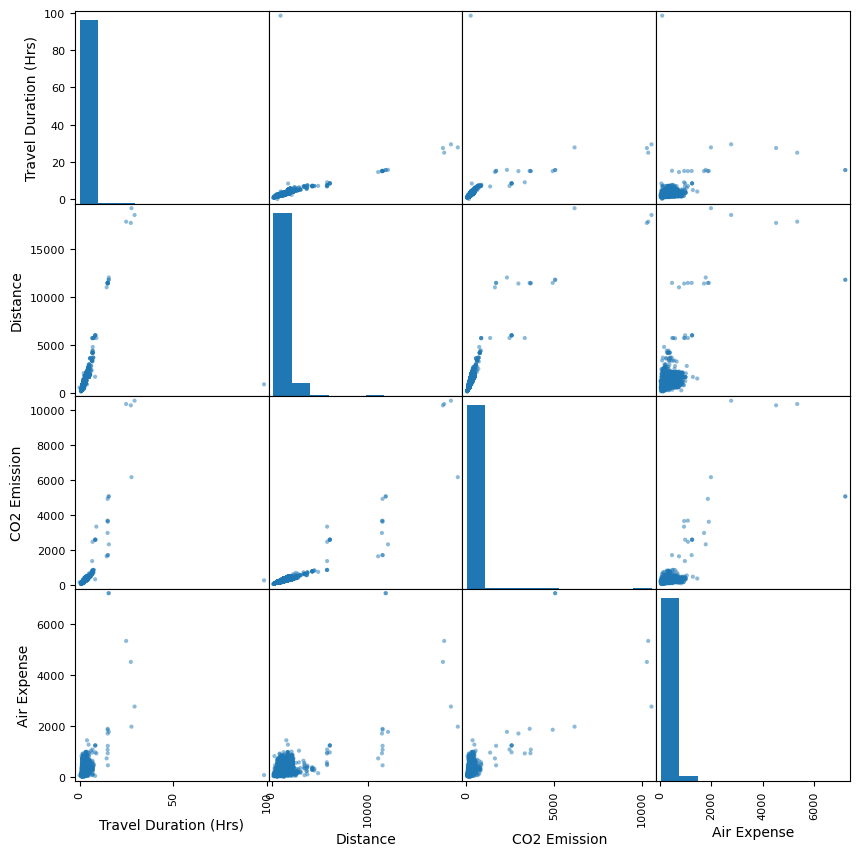

In [43]:
# Plot scatter matrix of highly correlated variables.
pd.plotting.scatter_matrix(df[['Travel Duration (Hrs)', 'Distance', 'CO2 Emission', 'Air Expense']], figsize=(10, 10))
plt.show()

In [44]:
# Remove outlier.
df = df[(df['Travel Duration (Hrs)'] != df['Travel Duration (Hrs)'].max())]

# Remove zero.
df = df[(df['Travel Duration (Hrs)'] != df['Travel Duration (Hrs)'].min())]


In [45]:
# Logarithmic transform.
log_df = np.log(df[['Travel Duration (Hrs)', 'Distance', 'CO2 Emission', 'Air Expense']] + 1)

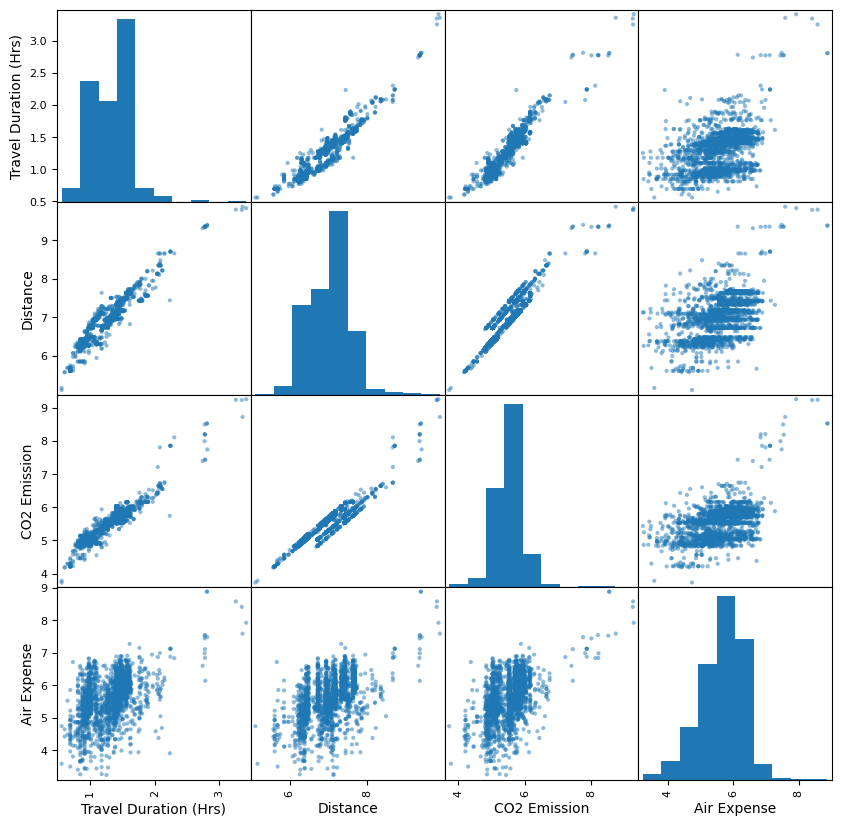

In [46]:
# Scatter matrix with log transform.
pd.plotting.scatter_matrix(log_df, figsize=(10, 10))
plt.show()

In [47]:
# Correlation matrix.
correlation_matrix = log_df.corr()
correlation_matrix

,Travel Duration (Hrs),Distance,CO2 Emission,Air Expense
Travel Duration (Hrs),1.000000,0.942605,0.940755,0.487861
Distance,0.942605,1.000000,0.920455,0.538194
CO2 Emission,0.940755,0.920455,1.000000,0.509736
Air Expense,0.487861,0.538194,0.509736,1.000000


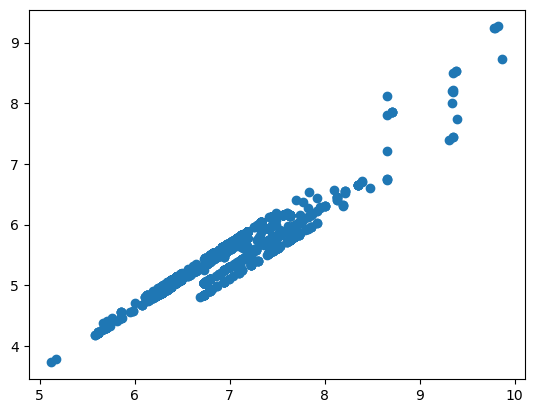

In [48]:
# Scatter plot of CO2 emission against distance.
plt.scatter(log_df['Distance'], log_df['CO2 Emission'] )

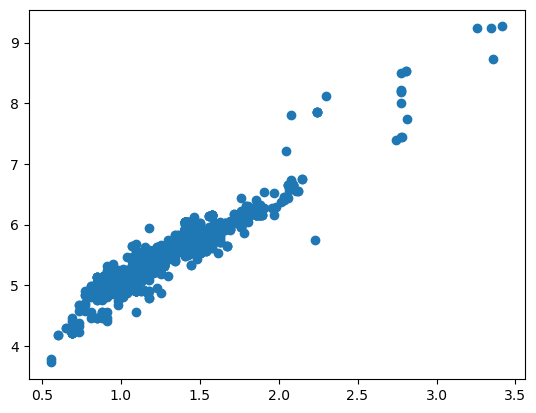

In [49]:
# Scatter plot of CO2 emission against travel duration.
plt.scatter(log_df['Travel Duration (Hrs)'], log_df['CO2 Emission'] )

In [50]:
df['CO2 per dist'] = log_df['CO2 Emission'] / log_df['Distance']
df['CO2 per time'] = log_df['CO2 Emission'] / log_df['Travel Duration (Hrs)']

In [51]:
df['CO2 per dist'].sort_values()

2084    0.718506
952     0.719952
2045    0.719952
1186    0.719952
2035    0.719952
          ...   
2077    0.909718
101     0.937144
1663    0.942592
1665    0.944379
2220    0.944421
Name: CO2 per dist, Length: 2327, dtype: float64

In [52]:
df['CO2 per time'].sort_values()

2197    2.571712
276     2.598735
97      2.672865
98      2.677838
103     2.699068
          ...   
910     6.599371
803     6.662751
787     6.756834
161     6.903301
90      6.903301
Name: CO2 per time, Length: 2327, dtype: float64

In [53]:
print(df['CO2 per dist'].describe())
print(df['CO2 per time'].describe())

count    2327.000000
mean        0.784989
std         0.026134
min         0.718506
25%         0.771342
50%         0.780785
75%         0.800343
max         0.944421
Name: CO2 per dist, dtype: float64
count    2327.000000
mean        4.356710
std         0.725567
min         2.571712
25%         3.840647
50%         4.081235
75%         4.900509
max         6.903301
Name: CO2 per time, dtype: float64


<Axes: xlabel='CO2 per time', ylabel='Density'>

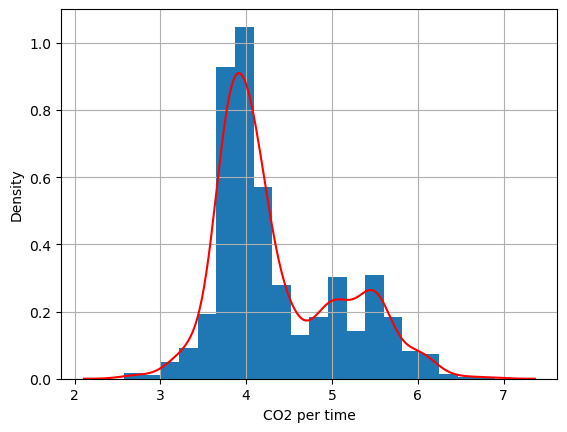

In [54]:
# Histogram of CO2 per time.
df['CO2 per time'].hist(bins=20, density = True)
sns.kdeplot(df['CO2 per time'], color='r', label='KDE')

<Axes: xlabel='CO2 per dist', ylabel='Density'>

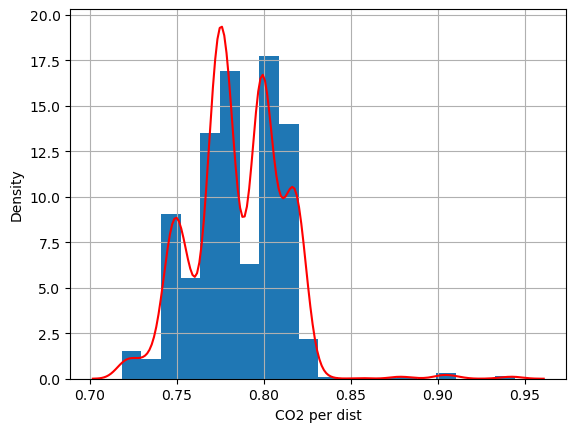

In [55]:
# Histogram of CO2 per distance.
df['CO2 per dist'].hist(bins=20, density = True)
sns.kdeplot(df['CO2 per dist'], color='r', label='KDE')

<Axes: xlabel='Air Expense', ylabel='Density'>

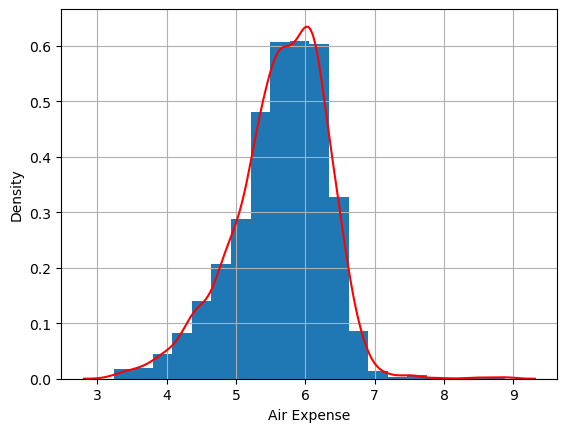

In [56]:
# Histogram of Air Expense.
log_df['Air Expense'].hist(bins=20, density = True)
sns.kdeplot(log_df['Air Expense'], color='r', label='KDE')

In [57]:
log_df['Air Expense'].describe()

count    2327.000000
mean        5.646208
std         0.671141
min         3.235143
25%         5.277451
50%         5.708471
75%         6.115174
max         8.883385
Name: Air Expense, dtype: float64

In [66]:
# Average without transformations
print((df['CO2 Emission'] / df['Distance']).mean())

0.2233507105568434
